<a href="https://colab.research.google.com/github/Sunkohli/Lab-1-Quantum-Algorithm/blob/main/Deutsch_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install qiskit qiskit_aer qiskit-ibm-runtime matplotlib pylatexenc

In [18]:
%pip install "qiskit-aer>=0.17.0"

In [19]:
###DJ algo for constant function
#import required packages
import qiskit
from qiskit import QuantumRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram

def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

In [26]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

In [21]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.

    qc = compile_circuit(function)

    backend = AerSimulator()
    qc_compiled = transpile(qc, backend)
    job_sim = backend.run(qc, shots=32,memory=True)
    result_sim = job_sim.result()
    measurements = result_sim.get_memory()
    print(measurements)
    if measurements[0] == "0":
        return "constant"
    return "balanced"



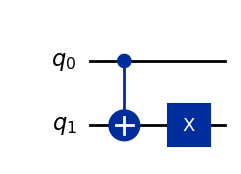

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


'balanced'

In [27]:
f = deutsch_function(3)
display(f.draw("mpl"))
display(deutsch_algorithm(f))